# Weather in Szeged

## Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

## Loading Data

In [2]:
data = pd.read_csv('weatherHistory.csv')
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


## Data Cleaning and Filtering

In [3]:
# Converting 'Formatted Date' to datetime
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)

# Extracting useful information from the datetime column
data['Year'] = data['Formatted Date'].dt.year
data['Month'] = data['Formatted Date'].dt.month
data['Day'] = data['Formatted Date'].dt.day
data['Hour'] = data['Formatted Date'].dt.hour


# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Drop rows with missing values
data = data.dropna()

# Checking for duplicate rows
duplicates = data.duplicated().sum()
print(f"\nDuplicates: {duplicates}")

# Droppping duplicates
data = data.drop_duplicates()

data.rename(columns={'Loud Cover': 'Cloud Cover'}, inplace=True)

# Saving the cleaned dataset to a new file
data.to_csv('cleaned_weatherHistory.csv', index=False)

print("\nCleaned Data:")
print(data.head())


Missing Values:
Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
Year                          0
Month                         0
Day                           0
Hour                          0
dtype: int64

Duplicates: 24

Cleaned Data:
             Formatted Date        Summary Precip Type  Temperature (C)  \
0 2006-03-31 22:00:00+00:00  Partly Cloudy        rain         9.472222   
1 2006-03-31 23:00:00+00:00  Partly Cloudy        rain         9.355556   
2 2006-04-01 00:00:00+00:00  Mostly Cloudy        rain         9.377778   
3 2006-04-01 01:00:00+00:00  Partly Cloudy        rain         8.288889   
4 2006-04-01 02:00:00+00:00  Mostly Cloudy        ra

In [4]:
data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars),Daily Summary,Year,Month,Day,Hour
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,3,31,22
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,3,31,23
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,4,1,0
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006,4,1,1
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 17:00:00+00:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,2016,9,9,17
96449,2016-09-09 18:00:00+00:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,2016,9,9,18
96450,2016-09-09 19:00:00+00:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,2016,9,9,19
96451,2016-09-09 20:00:00+00:00,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,2016,9,9,20


## Standardizing Data and Applying Ridge Regularization

In [5]:
# Separating features and target
X = data[['Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 
          'Wind Bearing (degrees)', 'Visibility (km)', 'Cloud Cover', 
          'Pressure (millibars)', 'Year', 'Month', 'Day', 'Hour']]
y = data['Temperature (C)']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Ridge regularization
ridge = Ridge(alpha=1.0)
ridge.fit(X_scaled, y)

# Printing the coefficients
print("Coefficients:", ridge.coef_)

Coefficients: [ 9.34366271e+00 -2.85469626e-01  5.53540300e-01 -4.27884899e-02
  3.36745124e-02  0.00000000e+00 -2.37800848e-02  1.80218299e-02
  1.83473813e-02 -1.74015191e-02  3.94019869e-04]


# Modeling

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
 

In [7]:
#splitting data into tragining and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Creation of the pipeline
pipeline = Pipeline([('scaler', StandardScaler()), ('regressor', DecisionTreeRegressor(random_state=42))])





In [16]:
def train_and_evaluate_model(model):
    #Fit model and use model to predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    #Calculate the evaluation metrics
    r2 = r2_score(y_test, y_pred)
    print(f"R-squared: {r2}")
    
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")
    
    rmse = mse**0.5
    print(f"Root Mean Squared Error: {rmse}")
    
    #Visualise the results
    f, ax = plt.subplots(figsize = (5,5))
    ax.set_title('Actual vs Predicted')
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    ax.scatter(y_test, y_pred)
    plt.show()
    
    return model

R-squared: 0.9999276649833952
Mean Squared Error: 0.006633990808476898
Root Mean Squared Error: 0.08144931435240506


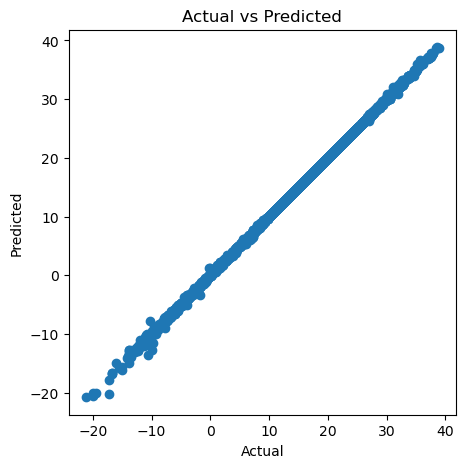

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', DecisionTreeRegressor(random_state=42))])

In [17]:
train_and_evaluate_model(pipeline)